# Earth Lab Python Course Final Project: US Soil Moisture Project

* This notebook is a data retrieval notebook for soil moisture data from the National Soil Moisture Network SCAN stations.
* Data Source: National Soil Moisture Network; Soil Climate Analysis Network (SCAN)

In [1]:
NAME = "Kendall Rosenberg"
COLLABORATORS = "N/A"

## Outstanding tasks:
* standardization around total mean (not just by time period)
* AUTOMATION !!!
* edit function docstrings in the python script
* define how to run notebook in README
* examine / deal with missing data

## Future tasks/direction:
* Compare with LERI: https://psl.noaa.gov/leri/
* Compare with other drought indices: https://www.ncdc.noaa.gov/temp-and-precip/drought/nadm/indices/palmer/stn#select-form

## Import Libraries

In [2]:
# Import necessary libraries
import os
import matplotlib.pyplot as plt
import earthpy as et
import warnings
import pandas as pd
import earthpy.plot as ep
from scipy import stats
from scipy.stats import zscore
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns
import numpy as np

# Ignore warnings
warnings.simplefilter('ignore')

In [3]:
# Set working directory
os.chdir(os.path.join(et.io.HOME, 'earth-analytics', 'Soil-Moisture-Project', 'usgs-nccasc-soil-moisture'))

# # Create export csv directory
# if not os.path.exists("soil-moisture-export-csvs"):
#     os.mkdir("soil-moisture-export-csvs")

### Un-comment and run the cell below if you want to view all dataframes in full:

In [4]:
# # Command to make all dataframes display in full
# pd.set_option("display.max_rows", None, "display.max_columns", None)

## Functions:

In [5]:
# import custom script of functions needed to run this notebook
import customfunctions

### Need docstring / in-progress

In [6]:
# # Function to export a soil moisture dataframe as a csv to Jupyter Hub
# def export_csv(dataframe, export_path):
#     dataframe.to_csv(export_path)

## Download and Import Data

* Use custom function defined above to download, import, and clean each site's data.  These cleaned output dataframes are then placed inside of an output dictionary for ease of access.
* Each site can be called in the dictionary by the station name I have assigned it.  The names of available station data are displayed below the following cell.
* All of the data is placed into a dictionary under the name "soil_moisture_dict"

In [7]:
# Run script to import data
%run imports.py

In [8]:
month_list = ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')

In [9]:
# Display a list of all stations imported below
print(station_list)

['Bushland #2006', 'Nunn #2017', 'Fort Assiniboine #2019', 'Mandan #2020', 'Lind #2021', 'Beasley Lake #2032', 'Eastview Farm #2077', 'Mammoth Cave #2079', 'Abrams #2092']


# START QUERY HERE

## Enter station name and year desired:
* This cell will determine the output of the notebook.
* Enter station name (from list above, exactly as it appears in the list) that you wish to examine
* Enter the year you wish to examine for outputs that examine specific years (monthly mean, daily mean, etc.)

In [51]:
# Enter station name and year for analysis
variable = "Nunn #2017"
year_view = 2010
year_str = "2010"

In [11]:
# # Change working directory for export csvs
# os.chdir("soil-moisture-export-csvs")

### Preview dataframe for any station

In [12]:
# Query for a specific station's soil moisture dataframe
soil_moisture_dict[variable]

,Station ID,year,month,day,doy,sm_5cm,sm_10cm,sm_20cm,sm_50cm,sm_100cm,decad,pentad
0,Beasley Lake #2032,1999.0,Sep,21.0,264.0,0.207,0.231,0.373,0.366,0.443,decad2,pentad4
1,Beasley Lake #2032,1999.0,Sep,22.0,265.0,0.200,0.207,0.356,0.363,0.455,decad2,pentad4
2,Beasley Lake #2032,1999.0,Sep,23.0,266.0,0.164,0.185,0.354,0.362,0.481,decad2,pentad4
3,Beasley Lake #2032,1999.0,Sep,24.0,267.0,0.154,0.184,0.355,0.362,0.479,decad2,pentad4
4,Beasley Lake #2032,1999.0,Sep,25.0,268.0,0.157,0.184,0.356,0.361,0.440,decad2,pentad4
...,...,...,...,...,...,...,...,...,...,...,...,...
6932,Beasley Lake #2032,2019.0,Jan,25.0,25.0,0.524,0.518,0.547,0.579,0.529,decad2,pentad4
6933,Beasley Lake #2032,2019.0,Jan,26.0,26.0,0.508,0.505,0.548,0.577,0.531,decad2,pentad5
6934,Beasley Lake #2032,2019.0,Jan,27.0,27.0,0.504,0.501,0.548,0.577,0.524,decad2,pentad5
6935,Beasley Lake #2032,2019.0,Jan,28.0,28.0,0.500,0.499,0.544,0.576,0.526,decad2,pentad5


In [13]:
# # Export to csv file
# soil_moisture_dict[variable].to_csv(variable+"_raw_sm.csv")

# # Where was this exported? See output
# os.getcwd()

### Soil Moisture Mean for Each Depth

In [14]:
# Print the mean values across historical period of soil moisture at each depth
mean_soil_moisture_df = soil_moisture_dict[variable]
five_cm_mean = mean_soil_moisture_df['sm_5cm'].mean()
ten_cm_mean = mean_soil_moisture_df['sm_10cm'].mean()
twenty_cm_mean = mean_soil_moisture_df['sm_20cm'].mean()
fifty_cm_mean = mean_soil_moisture_df['sm_50cm'].mean()
hundred_cm_mean = mean_soil_moisture_df['sm_100cm'].mean()

# Print these values
print("The 5cm mean is", five_cm_mean)
print("The 10cm mean is", ten_cm_mean)
print("The 20cm mean is", twenty_cm_mean)
print("The 50cm mean is", fifty_cm_mean)
print("The 100cm mean is", hundred_cm_mean)

The 5cm mean is 0.45502782182499635
The 10cm mean is 0.45694089664119936
The 20cm mean is 0.4981304598529624
The 50cm mean is 0.5549462841446666
The 100cm mean is 0.5343488539714575


### Missing data review

In [15]:
# Total number of missing values in each column
soil_moisture_dict[variable].isnull().sum()

Station ID      0
year            0
month           0
day             0
doy             0
sm_5cm          0
sm_10cm         0
sm_20cm         0
sm_50cm       384
sm_100cm        0
decad           0
pentad          0
dtype: int64

### Histogram of station data

In [16]:
# # Histogram of soil moisture values for a specific depth
# customfunctions.generate_hist(soil_moisture_dict[variable])

## Yearly Data

### Yearly Average

In [17]:
# Yearly average SM for any input station
station_yearly_mean_sm = customfunctions.yearly_avg_sm(soil_moisture_dict[variable])
station_yearly_mean_sm.head()

,sm_5cm,sm_10cm,sm_20cm,sm_50cm,sm_100cm
year,,,,,
1999.0,0.288931,0.318186,0.410500,0.429461,0.471431
2000.0,0.338440,0.377781,0.427792,0.543645,0.506268
2001.0,0.430789,0.447247,0.483400,0.545904,0.518397
2002.0,0.434433,0.438762,0.477499,0.551795,0.523786
2003.0,0.486038,0.467241,0.502151,0.565540,0.528477


In [18]:
# # Export above dataframe to csv
# station_yearly_mean_sm.to_csv(variable+"_annual_mean.csv")

# # Where was this exported? See output
# os.getcwd()

### Yearly Average Z-Score

In [19]:
# Create input df
station_yearly_mean_zscore = customfunctions.yearly_avg_sm(soil_moisture_dict[variable])

# Remove non-numeric columns
station_yearly_mean_zscore = station_yearly_mean_zscore[['sm_5cm', 'sm_10cm', 'sm_20cm', 'sm_50cm', 'sm_100cm']]

# Calculate z-score for each depth, ignoring any NAN values
station_yearly_mean_zscore = station_yearly_mean_zscore.apply(zscore, nan_policy='omit')
station_yearly_mean_zscore.head()

,sm_5cm,sm_10cm,sm_20cm,sm_50cm,sm_100cm
year,,,,,
1999.0,-3.002762,-2.834922,-2.078060,-3.709677,-3.343548
2000.0,-2.088979,-1.595289,-1.662459,-0.245385,-1.414704
2001.0,-0.384482,-0.150351,-0.325998,-0.176839,-0.743110
2002.0,-0.317227,-0.326845,-0.467830,0.001874,-0.444726
2003.0,0.635260,0.265553,0.124652,0.418897,-0.185024


In [20]:
# # Export above dataframe to csv
# station_yearly_mean_zscore.to_csv(variable+"_annual_zscore.csv")

# # Where was this exported? See output
# os.getcwd()

### Yearly Average Z-Score Plot

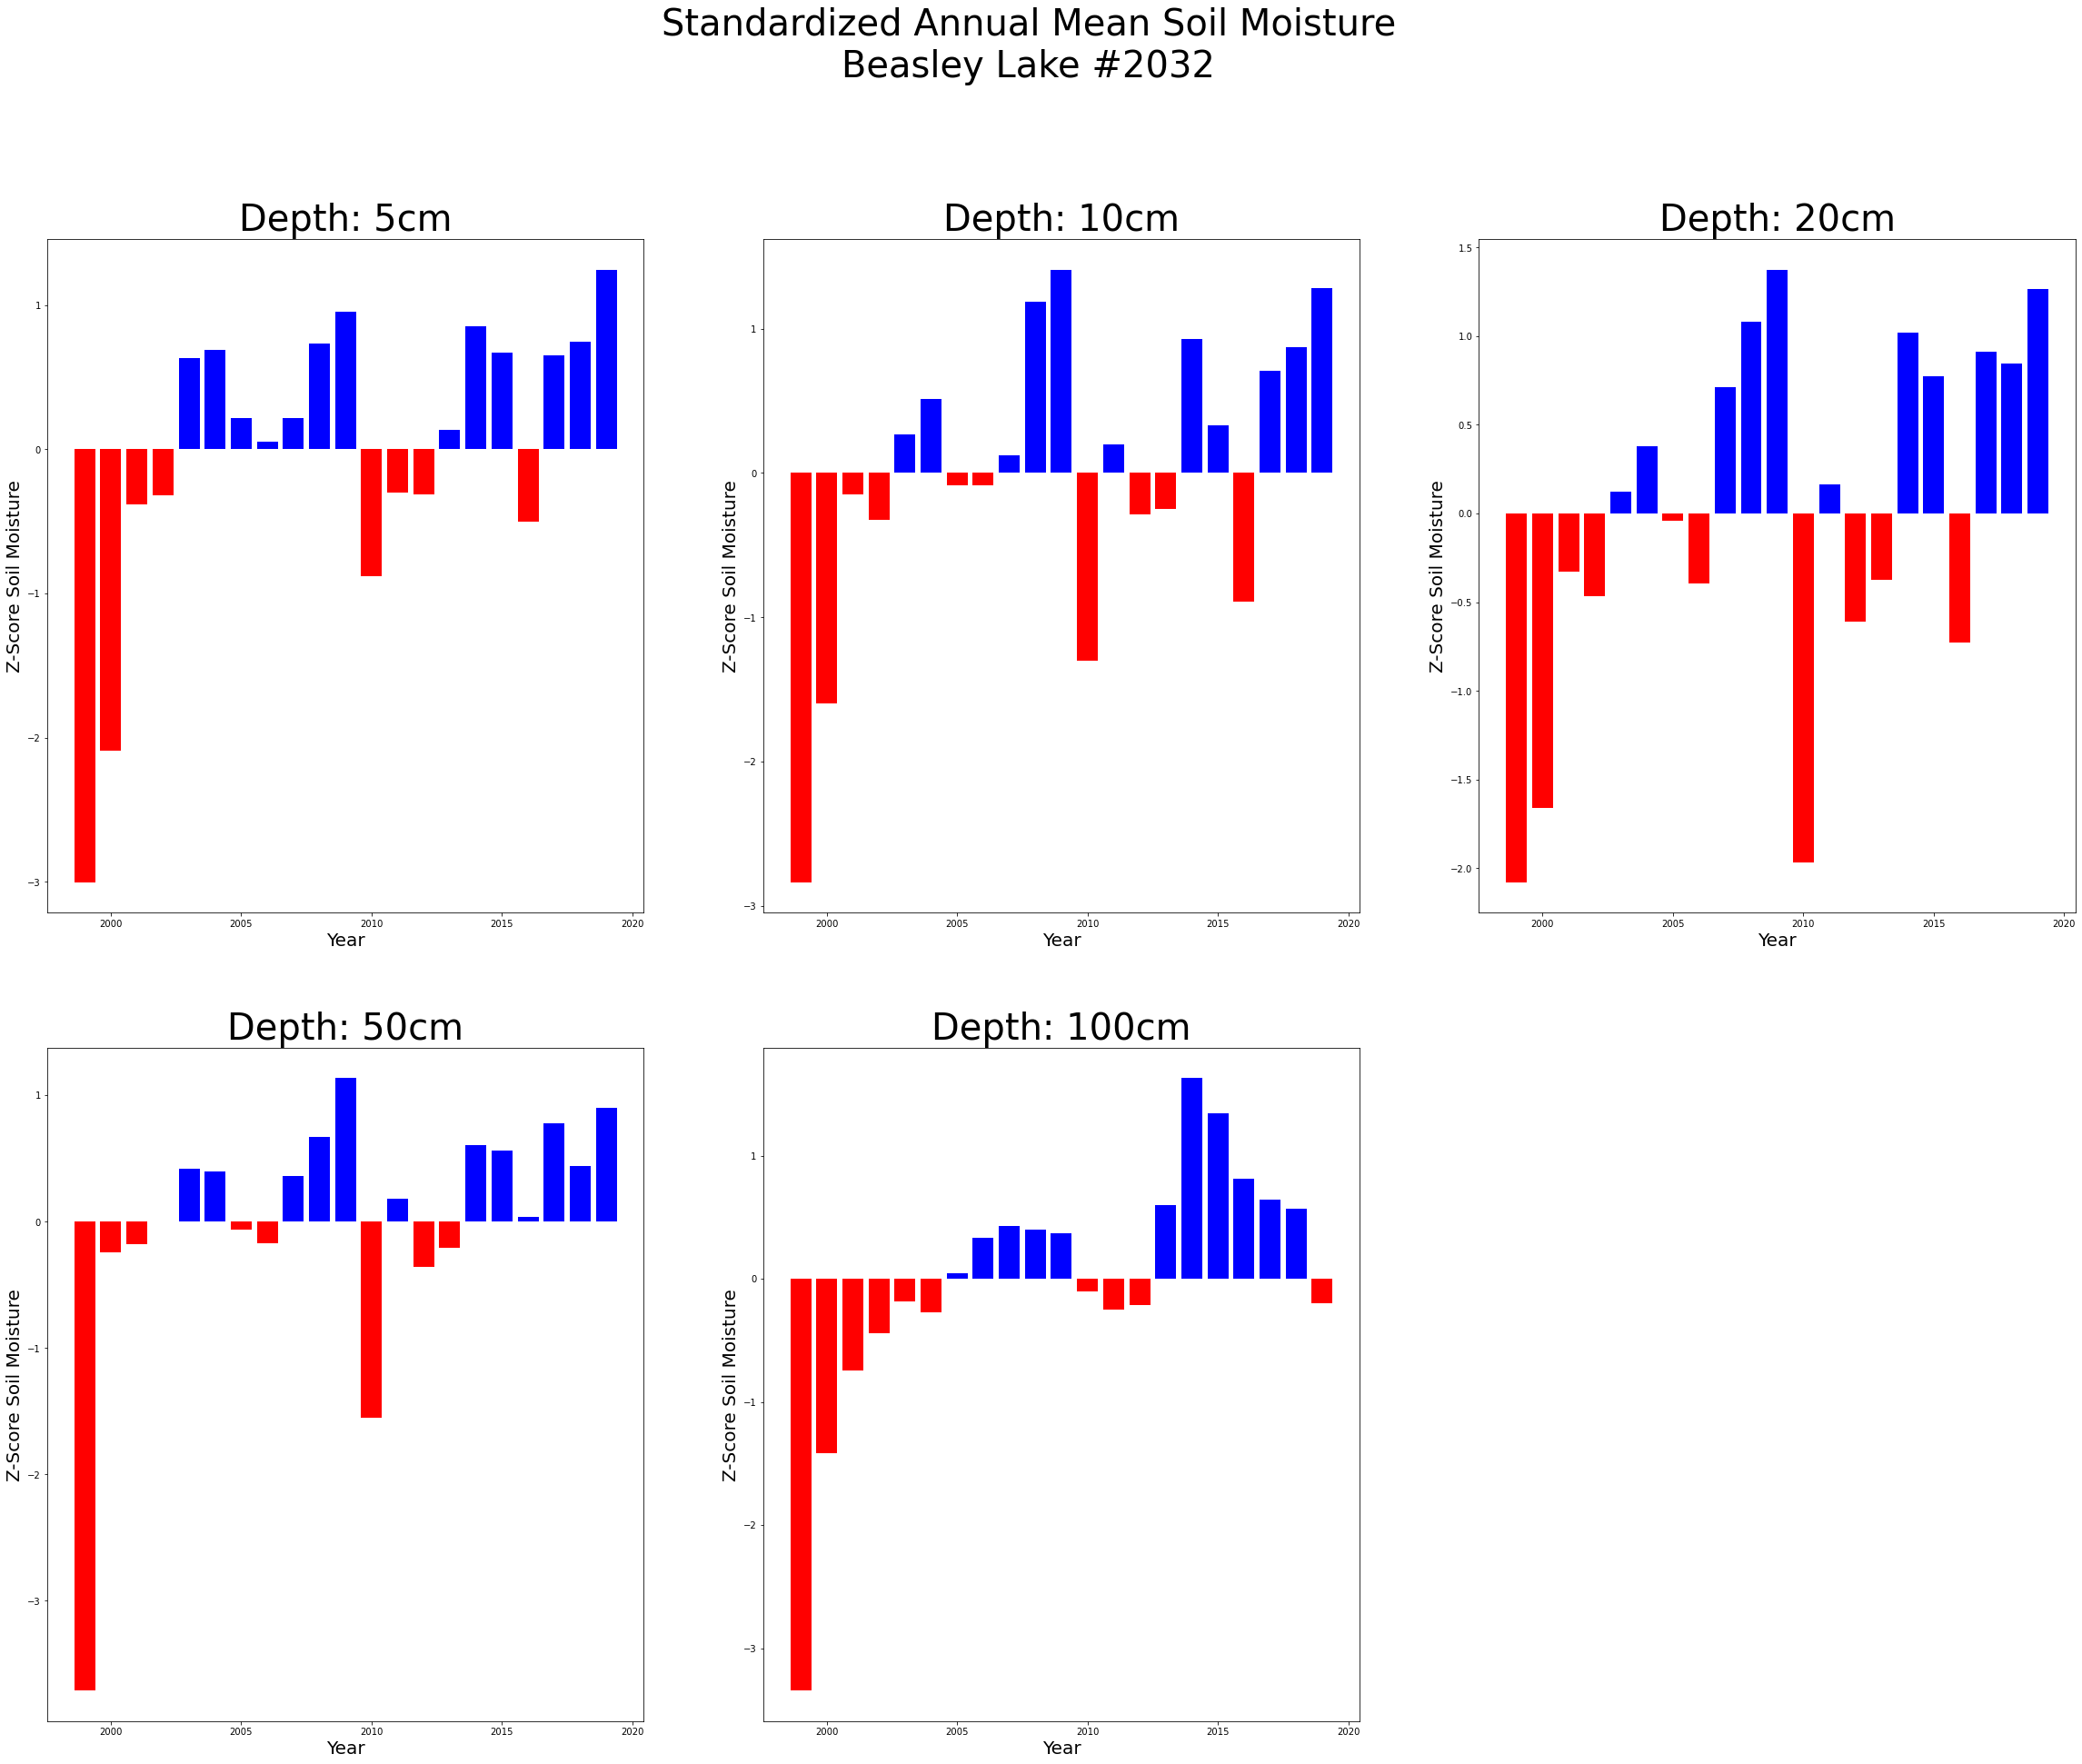

In [45]:
# Generate z-score plot of annual mean soil moisture
customfunctions.zscore_plot(station_yearly_mean_zscore, "Year", "Standardized Annual Mean Soil Moisture\n"+variable)

### Month of the Year Average

In [22]:
# Enter month here
month = 'Jul'

# Month of year average dataframe creation
station_yr_mean_month = customfunctions.yearly_mean_month(soil_moisture_dict[variable], month)
station_yr_mean_month.head()

,sm_5cm,sm_10cm,sm_20cm,sm_50cm,sm_100cm
year,,,,,
2000.0,0.271355,0.341323,0.394000,0.537355,0.503387
2001.0,0.418355,0.437710,0.475935,0.553839,0.520774
2002.0,0.369516,0.337452,0.395516,0.545581,0.525387
2003.0,0.483516,0.447387,0.448290,0.571194,0.531129
2004.0,0.437290,0.417581,0.471742,0.568935,0.530161


In [23]:
# # Export above dataframe to csv
# station_yr_mean_month.to_csv(variable+"_monthly_timeseries_"+month+".csv")

# # Where was this exported? See output
# os.getcwd()

### Month of Year Z-Score

In [24]:
# Enter month here
month = 'Jul'

# Create input df
month_of_year_zscore = customfunctions.yearly_mean_month(soil_moisture_dict[variable], month)

# Remove non-numeric columns
month_of_year_zscore = month_of_year_zscore[['sm_5cm', 'sm_10cm', 'sm_20cm', 'sm_50cm', 'sm_100cm']]

# Calculate z-score for each depth, ignoring any NAN values
month_of_year_zscore = month_of_year_zscore.apply(zscore, nan_policy='omit')

month_of_year_zscore.head()

,sm_5cm,sm_10cm,sm_20cm,sm_50cm,sm_100cm
year,,,,,
2000.0,-2.347109,-1.301455,-1.077702,-0.604290,-2.317084
2001.0,-0.330480,0.018460,-0.026232,-0.146948,-1.328118
2002.0,-1.000477,-1.354464,-1.058246,-0.376066,-1.065739
2003.0,0.563439,0.150982,-0.381000,0.334560,-0.739142
2004.0,-0.070712,-0.257185,-0.080048,0.271910,-0.794186


In [25]:
# # Export above dataframe to csv
# month_of_year_zscore.to_csv(variable+"_zscore_monthly_timeseries_"+month+".csv")

# # Where was this exported? See output
# os.getcwd()

### Month of Year Z-Score Plot
* Generate an image showing Z-Score distribution for a specific month across all years of data.  In the code cell below, please enter your desired figure title in quotes.

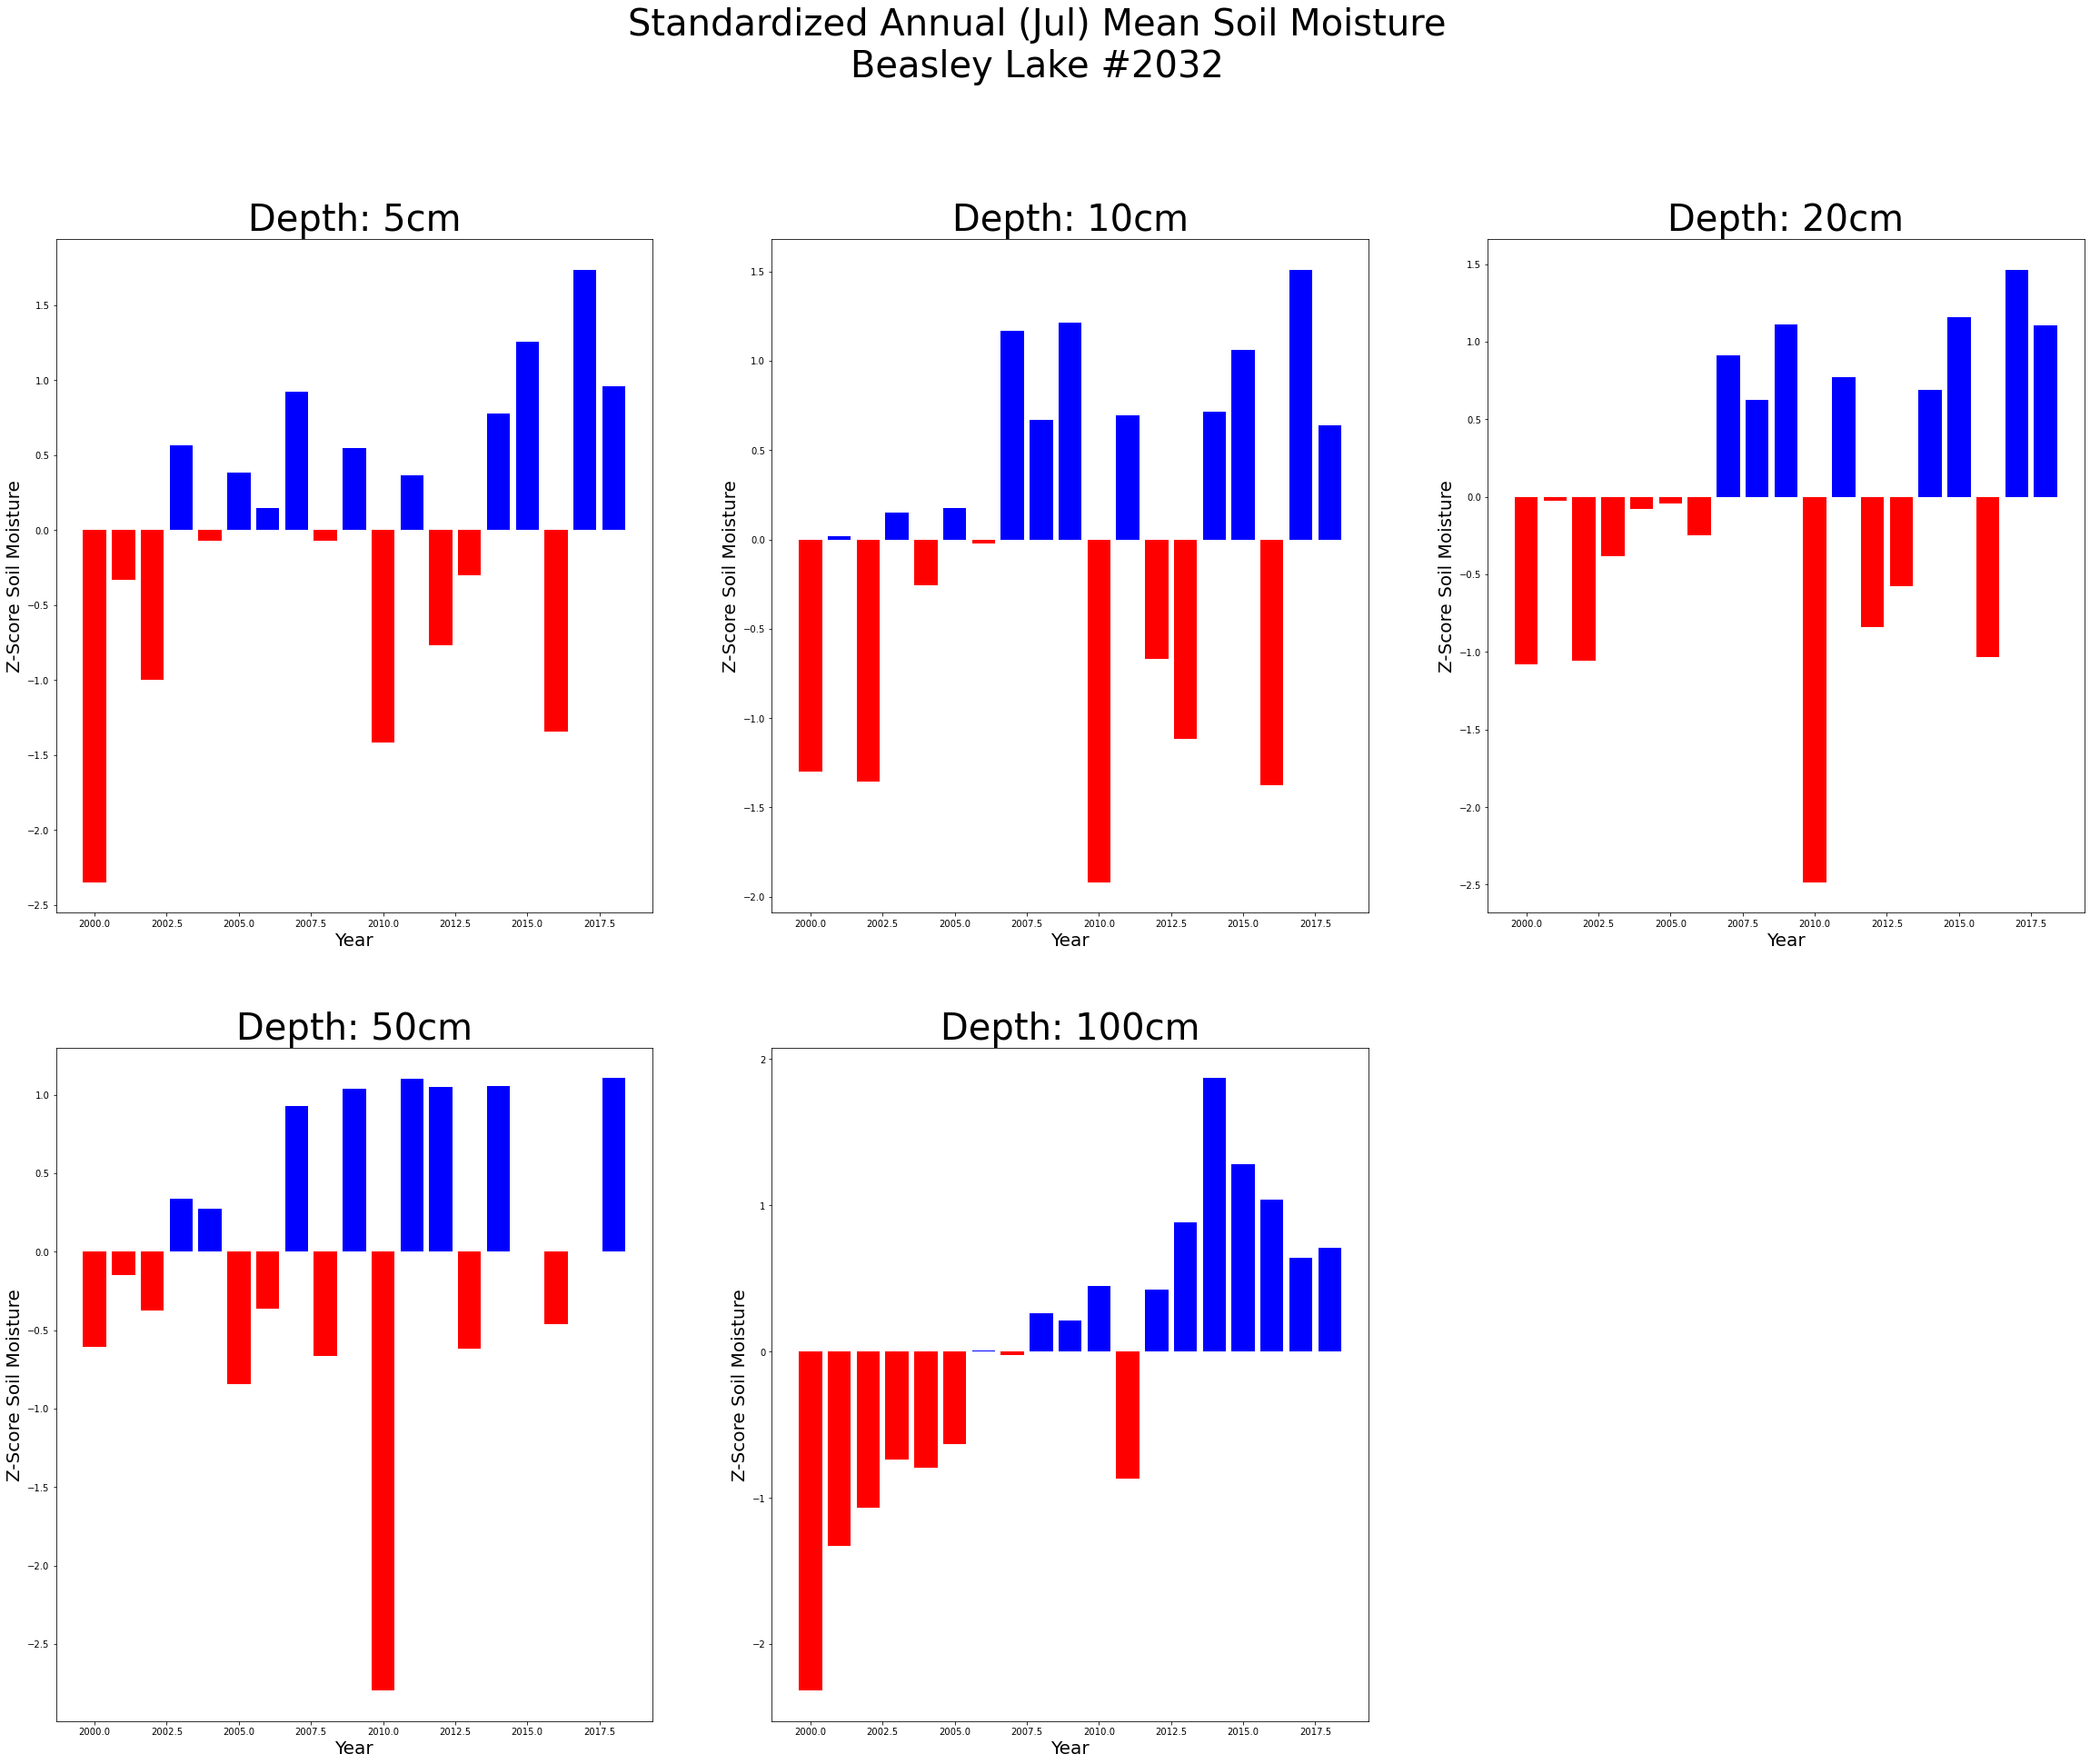

In [49]:
# Enter month to view in plot
month = 'Jul'

# Generate z-score plot of month of the year timeseries
customfunctions.zscore_plot(month_of_year_zscore, "Year", "Standardized Annual ("+month+") Mean Soil Moisture\n"+variable)

## Monthly Data

### Monthly Average for a Specific Year
* year must be in integer format

In [27]:
# Dataframe of monthly mean soil moisture 
station_monthly_mean_year = customfunctions.monthly_mean(soil_moisture_dict[variable], year_view)
station_monthly_mean_year

,sm_5cm,sm_10cm,sm_20cm,sm_50cm,sm_100cm
month,,,,,
Jan,0.501161,0.519194,0.550387,0.576710,0.529355
Feb,0.491464,0.524750,0.553679,0.579714,0.527000
Mar,0.486516,0.519258,0.549387,0.589935,0.529452
Apr,0.500700,0.529833,0.564000,0.598000,0.536233
May,0.491548,0.504677,0.556258,NaN,0.541871
Jun,0.406433,0.362300,0.422200,0.573600,0.549500
Jul,0.339226,0.296290,0.284484,0.458355,0.551968
Aug,0.333871,0.310323,0.330774,0.511871,0.552645
Sep,0.280433,0.212533,0.232400,0.393667,0.543533


In [28]:
# # Export above dataframe to csv
# station_monthly_mean_year.to_csv(variable+"_monthly_mean_2000.csv")

# # Where was this exported? See output
# os.getcwd()

### Monthly Average for a Specific Year Z-Score

In [29]:
# Generate z-score dataframe for monthly average soil moisture for a specified year
monthly_mean_zscore_dataframe = customfunctions.monthly_mean_zscore(soil_moisture_dict[variable], year_view)
monthly_mean_zscore_dataframe

,index,sm_5cm,sm_10cm,sm_20cm,sm_50cm,sm_100cm
month,,,,,,
Jan,2010.0,0.302206,0.719375,0.704086,1.247352,0.381714
Feb,2010.0,-0.231777,0.701319,0.656584,1.548967,0.340549
Mar,2010.0,-0.398337,0.376746,0.243143,1.437219,0.485730
Apr,2010.0,0.278478,0.872579,0.890775,1.491395,0.508698
May,2010.0,0.801440,1.037736,1.091510,NaN,0.471159
Jun,2010.0,-0.274795,-0.734815,-0.545641,0.086374,0.578288
Jul,2010.0,-1.416017,-1.918122,-2.483111,-2.796133,0.446150
Aug,2010.0,-1.121852,-1.300366,-1.425355,-0.903312,0.278619
Sep,2010.0,-1.243277,-1.635647,-1.989848,-2.002020,0.101764


In [30]:
# # Export above dataframe to csv
# monthly_mean_zscore_dataframe.to_csv(variable+"_2000_zscore_monthly_timeseries.csv")

# # Where was this exported? See output
# os.getcwd()

### Monthly Average for a Specific Year Z-Score Plot

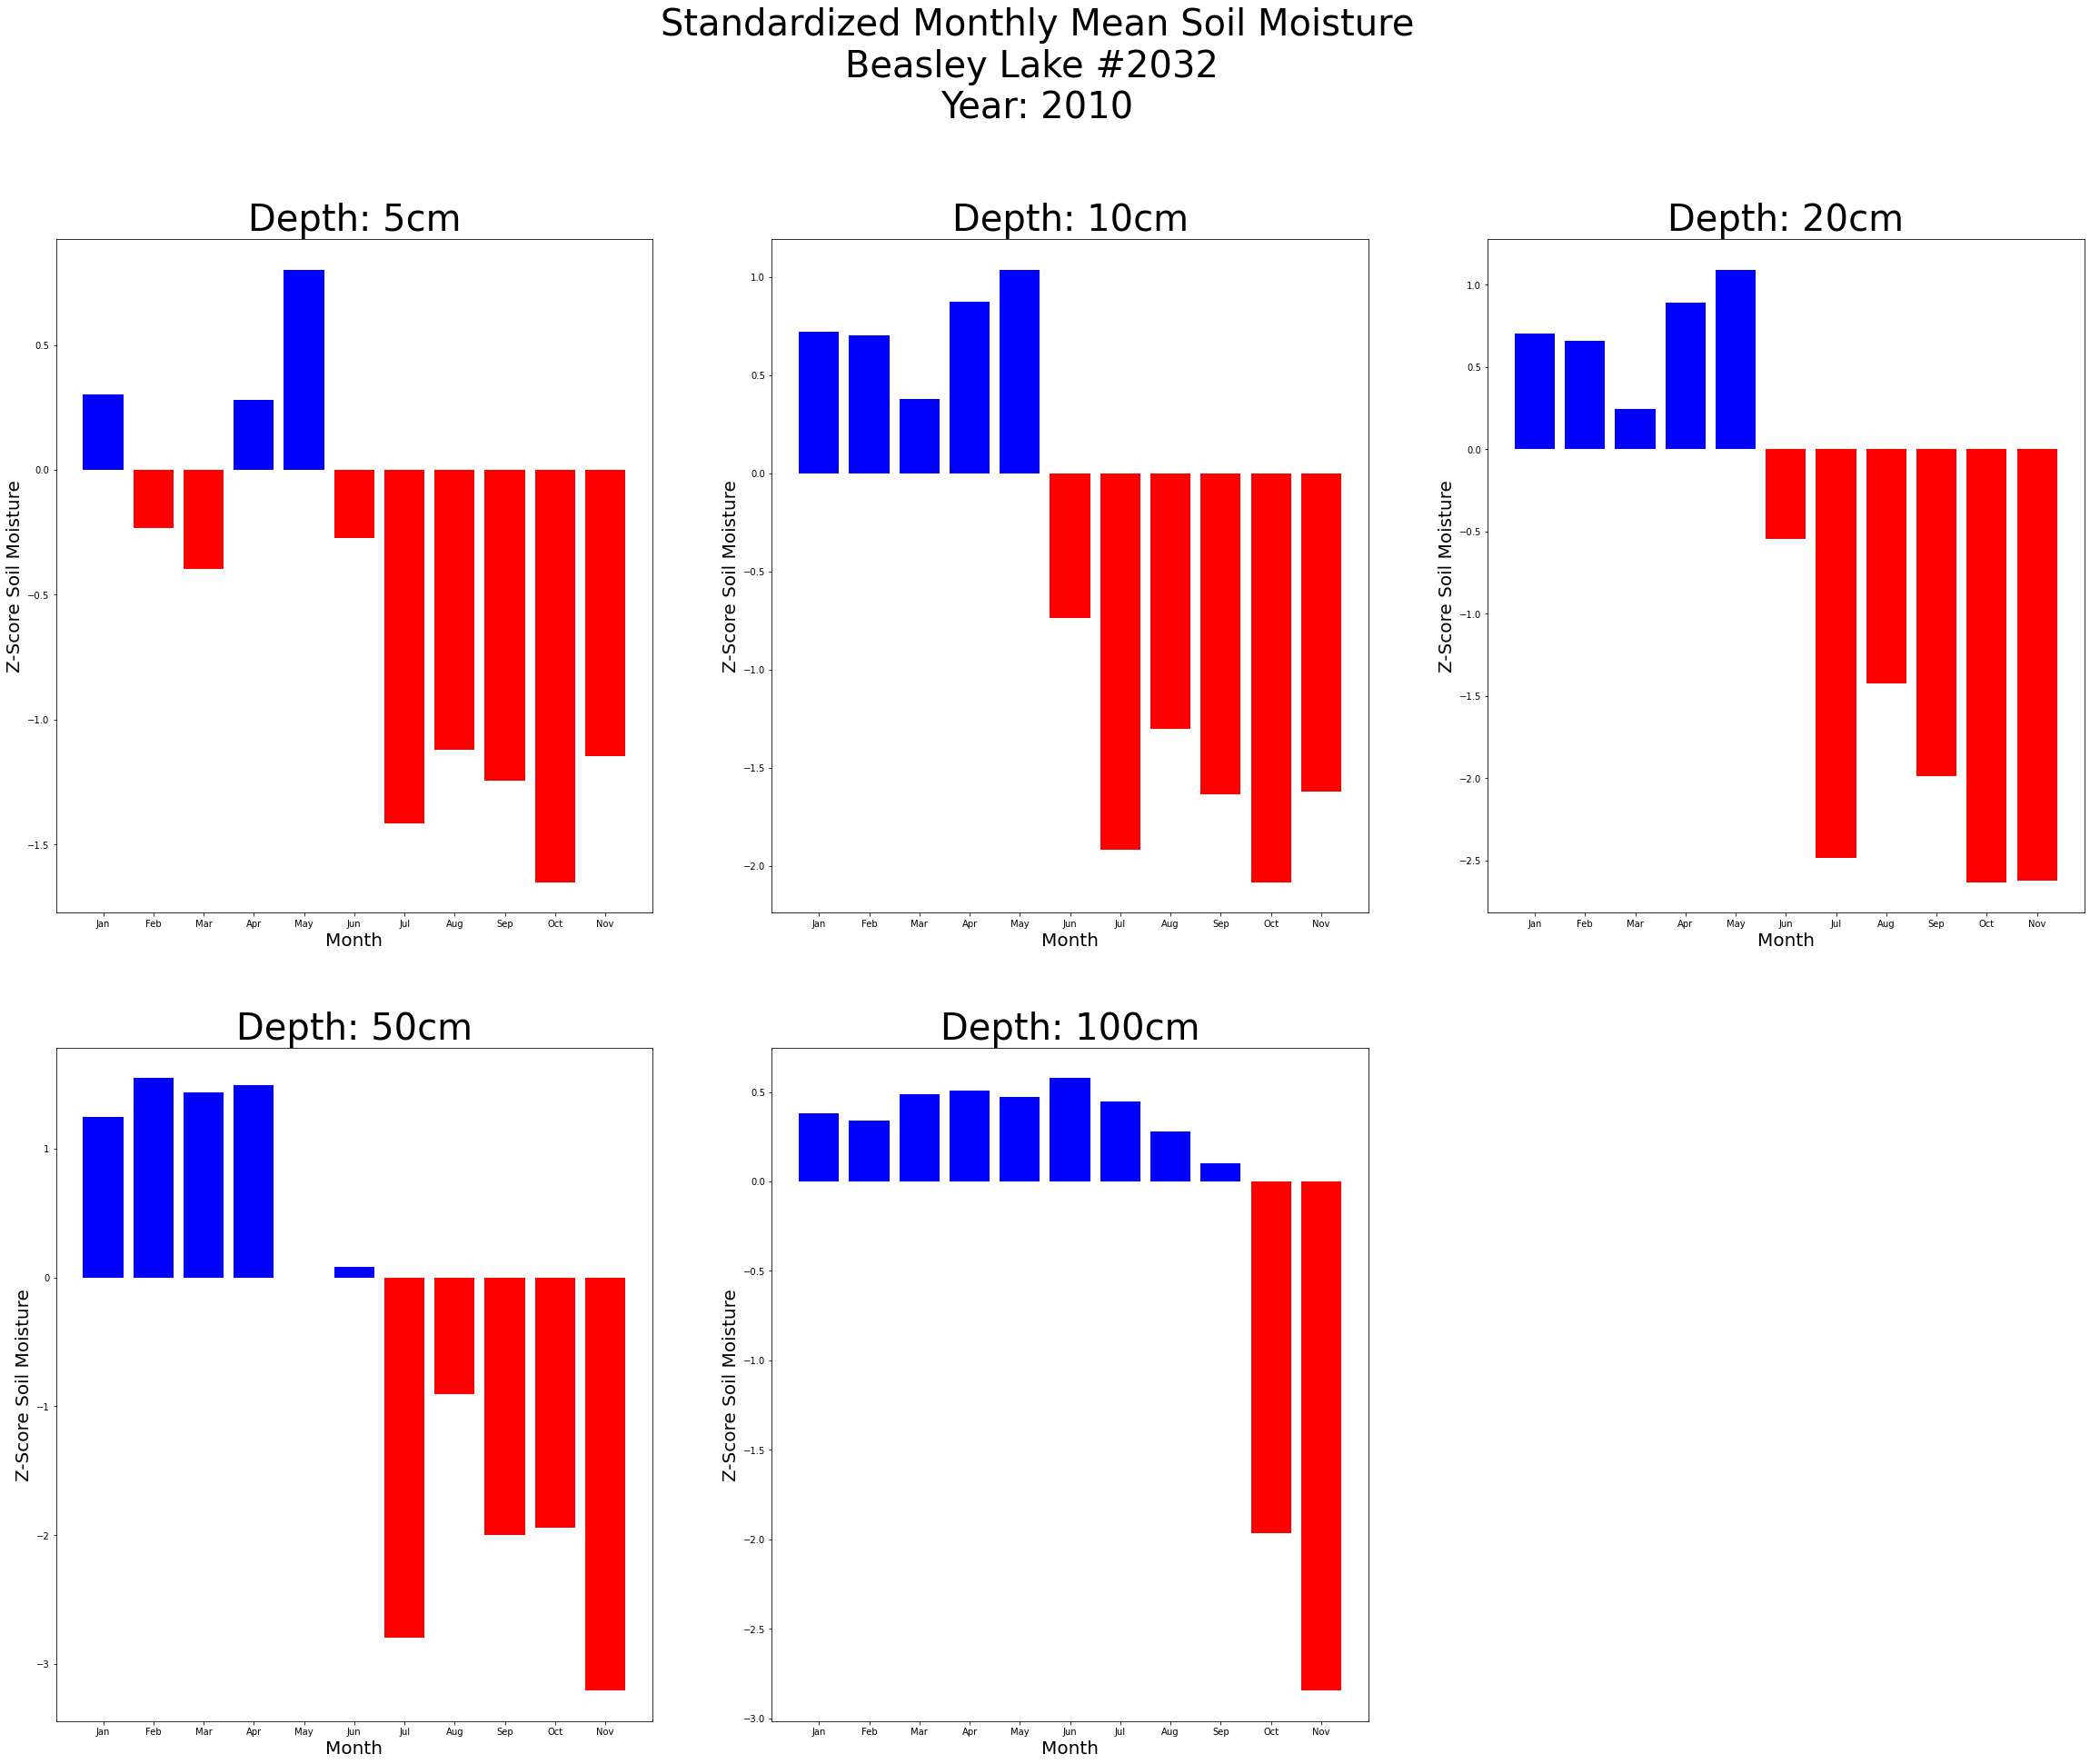

In [52]:
# Generate z-score plot of monthly mean soil moisture for a specified year
customfunctions.zscore_plot(monthly_mean_zscore_dataframe, "Month",
            "Standardized Monthly Mean Soil Moisture\n"+variable+" \nYear: "+year_str)

### Monthly average SM at each depth across all years of data

In [32]:
# Dataframe creation of monthly mean SM across all years of data
station_monthly_mean_all_years = customfunctions.monthly_mean_all_years(soil_moisture_dict[variable])
station_monthly_mean_all_years

,sm_5cm,sm_10cm,sm_20cm,sm_50cm,sm_100cm
month,,,,,
Jan,0.490923,0.500596,0.534560,0.559811,0.524799
Feb,0.498338,0.506813,0.539707,0.560546,0.523259
Mar,0.498975,0.508277,0.542524,0.566762,0.524342
Apr,0.490933,0.497581,0.538837,0.576591,0.530442
May,0.442857,0.442431,0.491985,0.574425,0.535616
Jun,0.424151,0.419309,0.462747,0.569504,0.541242
Jul,0.442445,0.436362,0.477980,0.555540,0.544124
Aug,0.433031,0.429049,0.466440,0.545837,0.546985
Sep,0.408472,0.395521,0.443728,0.530511,0.544024


In [33]:
# # Export above dataframe to csv
# station_monthly_mean_all_years.to_csv(variable+"_monthly_mean_all.csv")

# # Where was this exported? See output
# os.getcwd()

## Daily Data

### Daily average SM at each depth across a specific year
* year must be in integer format

In [34]:
# Daily average SM
station_daily_avg_year = customfunctions.daily_avg(soil_moisture_dict[variable], year_view)
station_daily_avg_year

,Station ID,year,month,day,sm_5cm,sm_10cm,sm_20cm,sm_50cm,sm_100cm,decad,pentad
doy,,,,,,,,,,,
1.0,Beasley Lake #2032,2010.0,Jan,1.0,0.519,0.533,0.555,0.583,0.531,decad0,pentad0
2.0,Beasley Lake #2032,2010.0,Jan,2.0,0.508,0.527,0.552,0.582,0.531,decad0,pentad0
3.0,Beasley Lake #2032,2010.0,Jan,3.0,0.501,0.524,0.550,0.582,0.527,decad0,pentad0
4.0,Beasley Lake #2032,2010.0,Jan,4.0,0.498,0.520,0.546,0.581,0.534,decad0,pentad0
5.0,Beasley Lake #2032,2010.0,Jan,5.0,0.489,0.510,0.541,0.576,0.532,decad0,pentad0
...,...,...,...,...,...,...,...,...,...,...,...
316.0,Beasley Lake #2032,2010.0,Nov,12.0,0.389,0.356,0.275,0.360,0.457,decad1,pentad2
317.0,Beasley Lake #2032,2010.0,Nov,13.0,0.386,0.360,0.274,0.364,0.457,decad1,pentad2
318.0,Beasley Lake #2032,2010.0,Nov,14.0,0.382,0.356,0.274,0.364,0.452,decad1,pentad2


In [60]:
# # Export above dataframe to csv
# station_daily_avg_year.to_csv(variable+"_daily_mean_"+year_str+".csv")

# # Where was this exported? See output
# os.getcwd()

'/home/jovyan/earth-analytics/Soil-Moisture-Project/usgs-nccasc-soil-moisture'

### Z-Score daily dataframe

### Z-Score daily plot

### Daily average SM for each day of the year, across all years of data

In [36]:
# Daily average SM across all years of data for the Bushland, TX station
station_daily_mean_all_years = customfunctions.daily_avg_all_years(soil_moisture_dict[variable])
station_daily_mean_all_years.head()

,sm_5cm,sm_10cm,sm_20cm,sm_50cm,sm_100cm
doy,,,,,
1.0,0.486158,0.503474,0.539368,0.561158,0.525421
2.0,0.483000,0.500053,0.532579,0.559211,0.525368
3.0,0.477684,0.497105,0.532421,0.559684,0.525684
4.0,0.481789,0.506474,0.535579,0.561368,0.526474
5.0,0.488105,0.506158,0.536316,0.560579,0.528105


In [37]:
# # Export above dataframe to csv
# station_daily_mean_all_years.to_csv(variable+"_doy_mean_all_years.csv")

# # Where was this exported? See output
# os.getcwd()

## Decad Dataframe

* decad0 = days 1-10
* decad1 = days 11-20
* decad2 = days 20-31 

In [38]:
# Create dataframe showing mean soil moisture over 5 monthly decads (~10 day periods)
station_decad_mean_df = customfunctions.decad_mean(soil_moisture_dict[variable], year_view).head()
station_decad_mean_df

sm_5cm  sm_10cm   sm_20cm   sm_50cm  sm_100cm
month decad                                                  
Jan   decad0  0.496500   0.5157  0.543000  0.575800  0.530600
      decad1  0.499300   0.5086  0.544700  0.569500  0.527200
      decad2  0.507091   0.5320  0.562273  0.584091  0.530182
Feb   decad0  0.507300   0.5329  0.557400  0.580100  0.528200
      decad1  0.490200   0.5243  0.555200  0.578400  0.527400

In [39]:
# # Export above dataframe to csv
# station_decad_mean_df.to_csv(variable+"_decad_mean_YEAR.csv")

# # Where was this exported? See output
# os.getcwd()

### Z-Score (Decad) Dataframe

### Z-Score (Decad) Plot

## Pentad Dataframe

* pentad0 = days 1-5
* pentad1 = days 6-10
* pentad2 = days 11-15
* pentad3 = days 16-20
* pentad4 = days 21-25
* pentad5 = days 25-31

In [40]:
# Create dataframe showing mean soil moisture over 5 monthly pentads (~5 day periods)
station_pentad_mean_df = customfunctions.pentad_mean(soil_moisture_dict[variable], year_view)
station_pentad_mean_df

sm_5cm  sm_10cm  sm_20cm  sm_50cm  sm_100cm
month pentad                                              
Jan   pentad0  0.5030   0.5228   0.5488   0.5808    0.5310
      pentad1  0.4900   0.5086   0.5372   0.5708    0.5302
      pentad2  0.4940   0.4958   0.5350   0.5656    0.5278
      pentad3  0.5046   0.5214   0.5544   0.5734    0.5266
      pentad4  0.5206   0.5406   0.5674   0.5842    0.5298
...               ...      ...      ...      ...       ...
Nov   pentad1  0.3290   0.2920   0.2360   0.3660    0.4640
      pentad2  0.3726   0.3430   0.2666   0.3638    0.4552
      pentad3  0.4910   0.4760   0.5420   0.3740    0.5080
      pentad4     NaN      NaN      NaN      NaN       NaN
      pentad5     NaN      NaN      NaN      NaN       NaN

[66 rows x 5 columns]

In [41]:
# # Export above dataframe to csv
# station_pentad_mean_df.to_csv(variable+"_pentad_mean_YEAR.csv")

# # Where was this exported? See output
# os.getcwd()

### Z-Score (Pentad) Dataframe

### Z-Score (Pentad) Plot

## PLOTS OF SOIL MOISTURE

### Yearly plots

* The code cell below will generate a plot of yearly mean soil moisture based on an input of the station name.  This name must match the name given in the "Download and Import Data" section for the station.  AKA it must be the name of the station's key in the dictionary created to hold all of the station soil moisture dataframes.

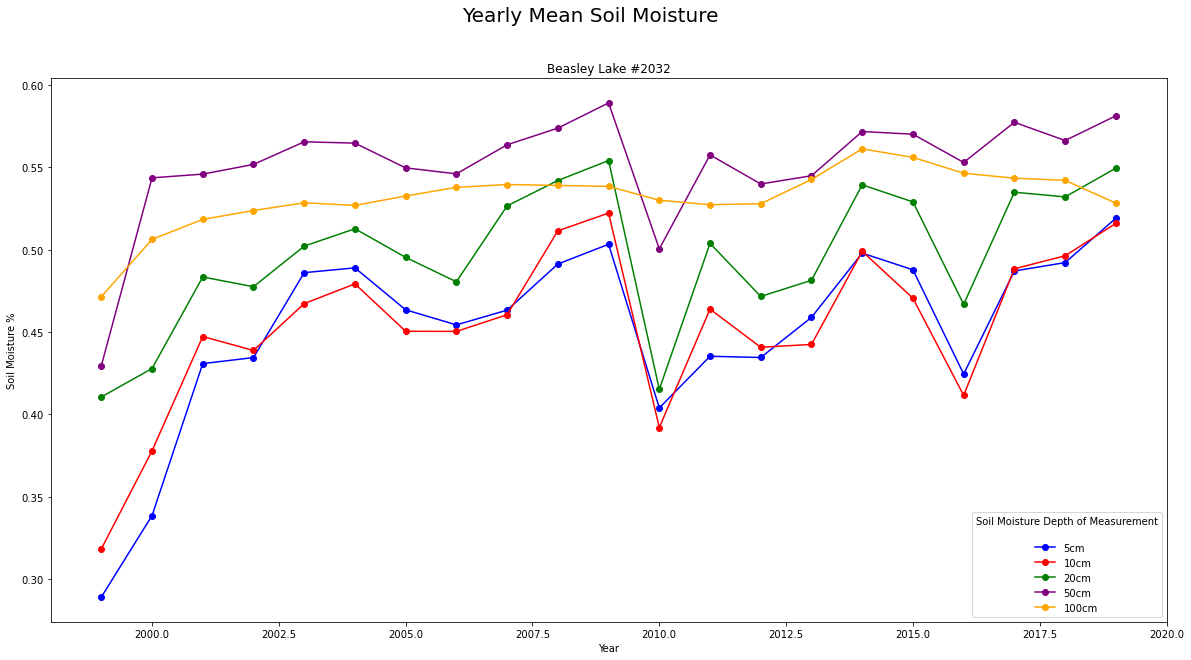

In [58]:
# Plot of yearly average soil moisture for a specified station across all years of data
customfunctions.plot_yearly_avg_sm(soil_moisture_dict[variable], variable)

### Monthly plots

* The code cell below will generate a plot of monthly mean soil moisture based on an input of the station name and the year specified.  This name must match the name given in the "Download and Import Data" section for the station.  AKA it must be the name of the station's key in the dictionary created to hold all of the station soil moisture dataframes.

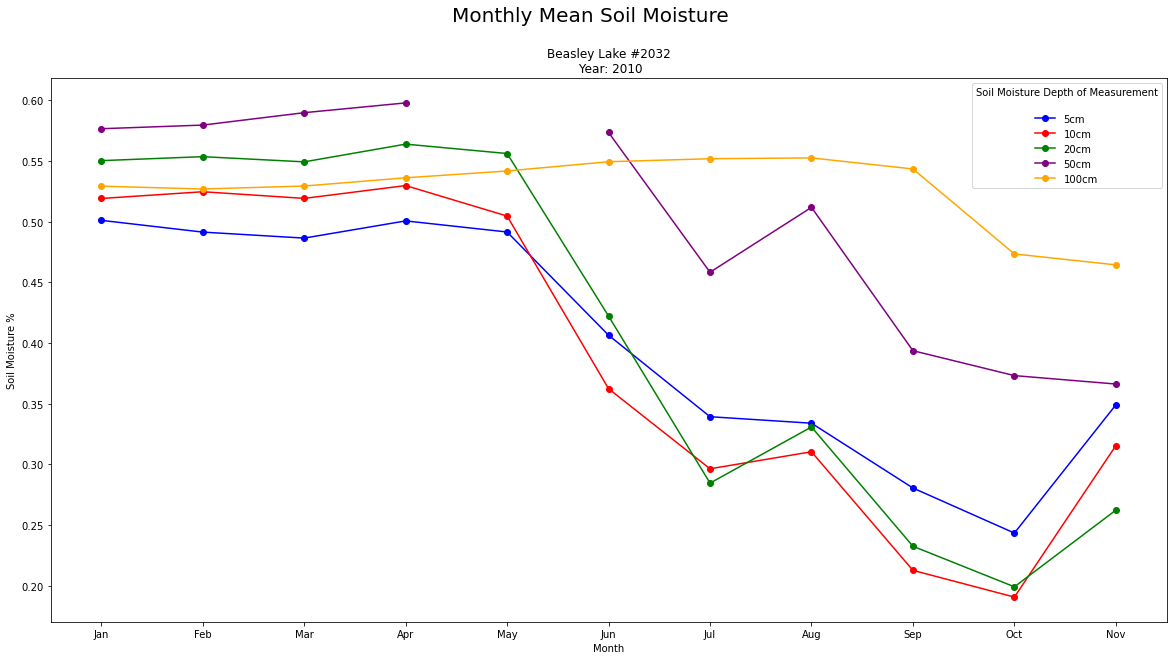

In [56]:
# Plot monthly average soil moisture for a specific station and year
customfunctions.plot_monthly_avg_sm(soil_moisture_dict[variable], year_view, variable+"\n Year: "+year_str)

### Daily plots

* The code cell below will generate a plot of daily mean soil moisture based on an input of the station name and the year specified.  This name must match the name given in the "Download and Import Data" section for the station.  AKA it must be the name of the station's key in the dictionary created to hold all of the station soil moisture dataframes.

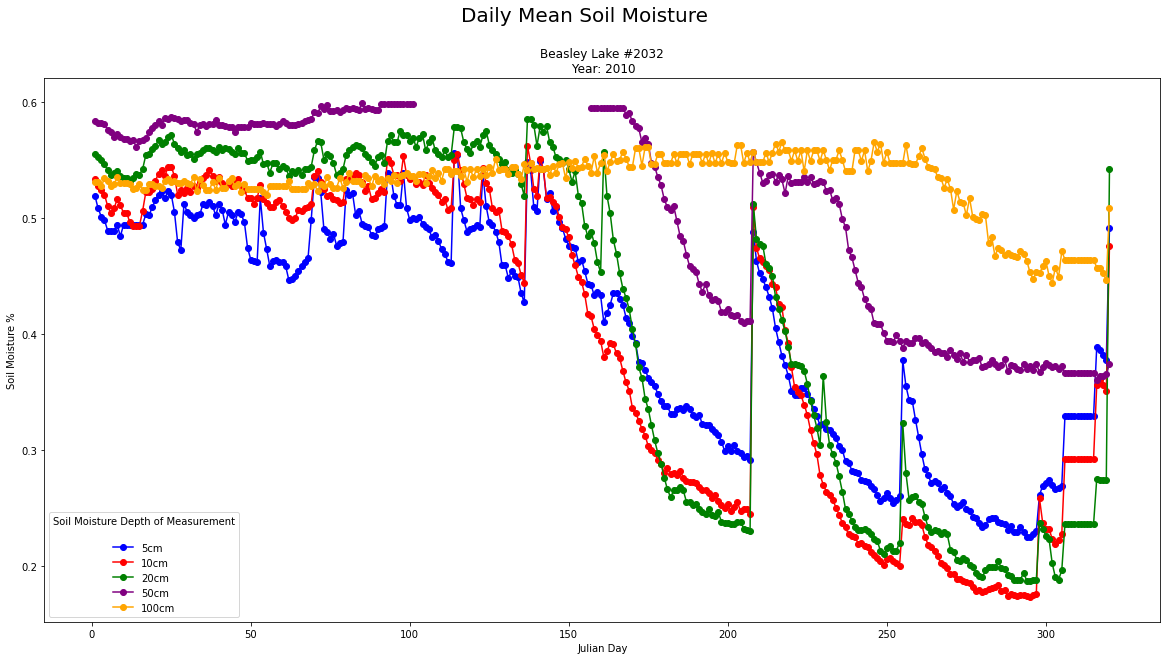

In [57]:
# Plot of daily mean soil moisture at a specified station for a specified year
customfunctions.plot_daily_avg_sm(soil_moisture_dict[variable], year_view, variable+"\n Year: "+year_str)